In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# File path:
path = "D:/Datasets1/StudentsPerformance.csv"
df = pd.read_csv(path)

df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [4]:
# Basic info
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [5]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [6]:
# Standardize column names
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# Confirm changes
print("\nCleaned column names:")
print(df.columns)


Cleaned column names:
Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')


In [7]:
##Exploratory Data Analysis (EDA):

# Descriptive statistics for scores
print(df[['math_score', 'reading_score', 'writing_score']].describe())

       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


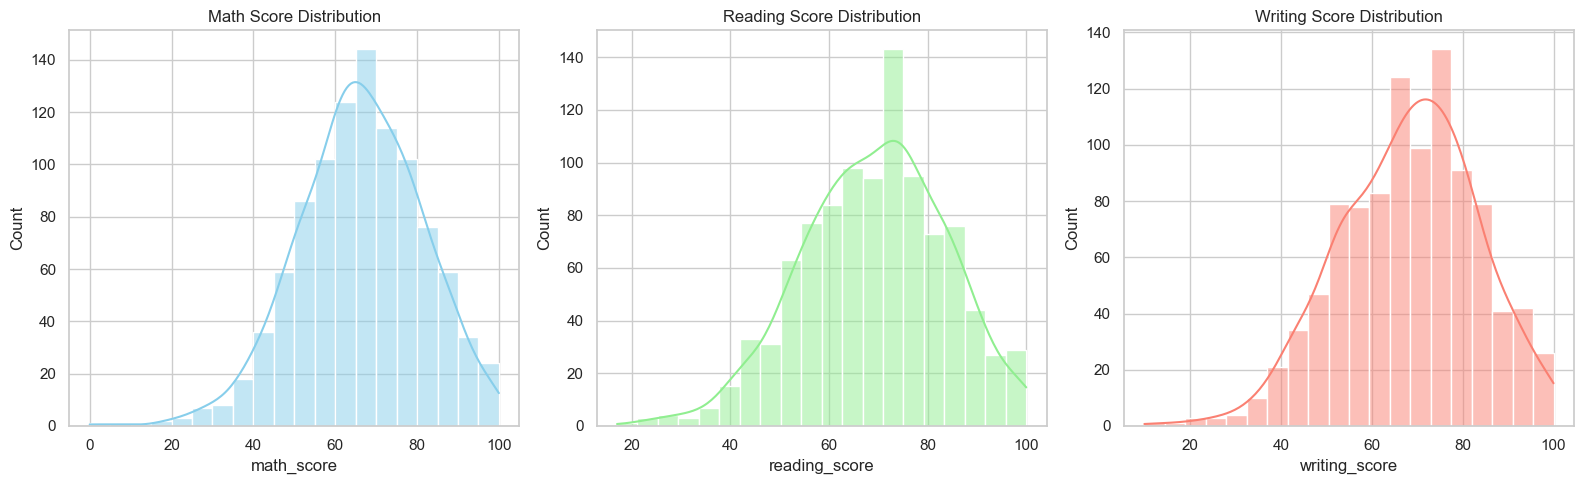

In [8]:
        #Visualize distributions of scores across different subjects.

# Set style
sns.set(style="whitegrid")

# Plot distributions
plt.figure(figsize=(16, 5))

# Math
plt.subplot(1, 3, 1)
sns.histplot(df['math_score'], kde=True, bins=20, color='skyblue')
plt.title('Math Score Distribution')

# Reading
plt.subplot(1, 3, 2)
sns.histplot(df['reading_score'], kde=True, bins=20, color='lightgreen')
plt.title('Reading Score Distribution')

# Writing
plt.subplot(1, 3, 3)
sns.histplot(df['writing_score'], kde=True, bins=20, color='salmon')
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()

#### Interpretation: 
The math scores are fairly spread out, but most students scored between 60 and 80. The distribution is slightly left-skewed, suggesting fewer students scored very low. There are also fewer extremely high scores (near 100)

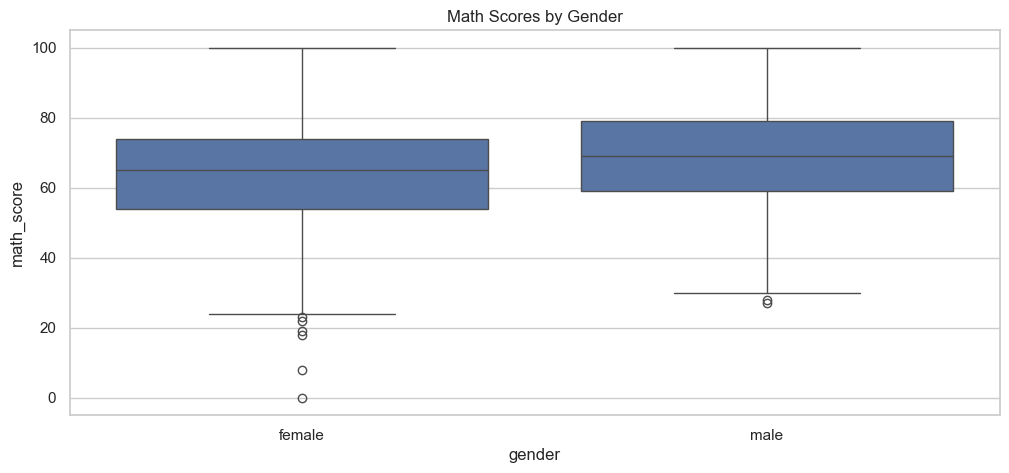

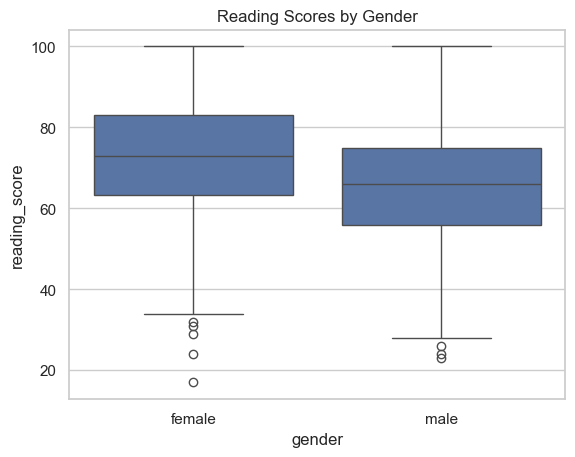

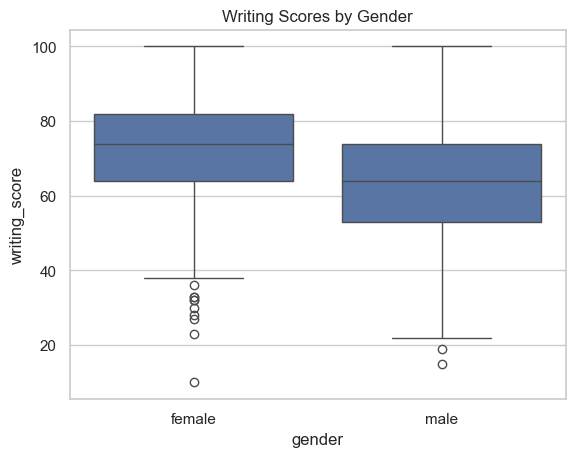

In [9]:
    #Analyze performance based on demographics such as gender, parental education level, and test preparation course completion.

# Gender-Based performance comparison
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='gender', y='math_score')
plt.title('Math Scores by Gender')
plt.show()

sns.boxplot(data=df, x='gender', y='reading_score')
plt.title('Reading Scores by Gender')
plt.show()

sns.boxplot(data=df, x='gender', y='writing_score')
plt.title('Writing Scores by Gender')
plt.show()


#### Interpretation: 
Male students had a slightly higher median math score than females, and their overall spread of scores was also wider. However, reading and writing boxplots showed females consistently scored higher in those areas

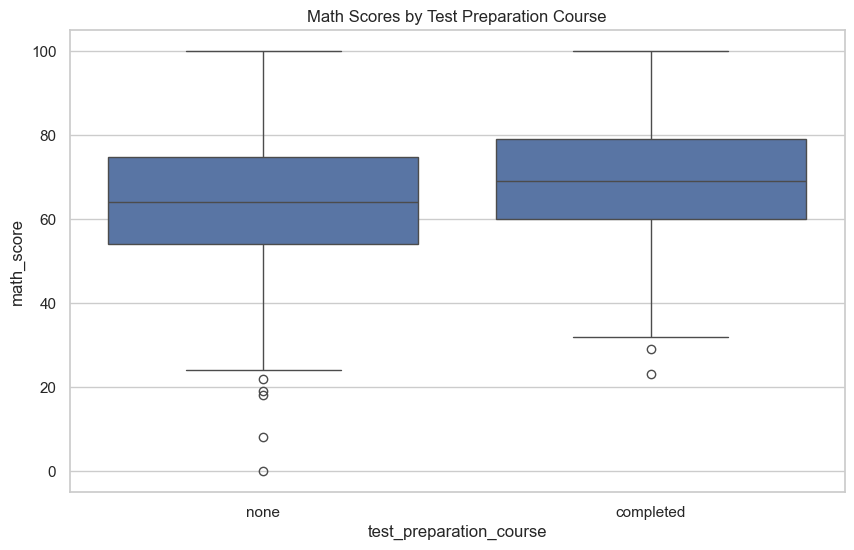

In [10]:
# Impact of test preparation course

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='test_preparation_course', y='math_score')
plt.title('Math Scores by Test Preparation Course')
plt.show()

#### Interpretation: 
Students who completed the test preparation course generally scored higher in math. Their median score is higher, and their lower scores aren’t as low, suggesting better overall performance.

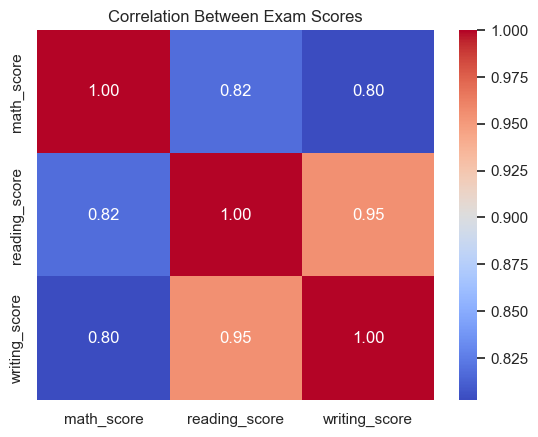

In [11]:
    # Correlation between subjects 
# Correlation matrix
corr = df[['math_score', 'reading_score', 'writing_score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Exam Scores")
plt.show()

#### Interpretation: 
Math, reading, and writing scores are all strongly positively correlated (above 0.80), which suggests that students who do well in one subject tend to do well in others.

In [12]:
from scipy import stats

In [13]:
##Statistical Analysis:

# Split into two groups
prep = df[df['test_preparation_course'] == 'completed']['math_score']
no_prep = df[df['test_preparation_course'] == 'none']['math_score']

# Perform independent t-test
t_stat, p_val = stats.ttest_ind(prep, no_prep, equal_var=False)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")

T-statistic: 5.79
P-value: 0.0000


#### Interpretation: 
The math scores of students who completed the test preparation course were significantly higher than those who did not (p < 0.01), suggesting the course may be effective.

In [14]:
# Correlation Strength
print(df[['math_score', 'reading_score', 'writing_score']].corr())

               math_score  reading_score  writing_score
math_score       1.000000       0.817580       0.802642
reading_score    0.817580       1.000000       0.954598
writing_score    0.802642       0.954598       1.000000


#### Interpretation: 
Math, reading, and writing scores are all strongly positively correlated. The highest correlation is between reading and writing (e.g., 0.95), suggesting strong overlap in performance.

In [15]:
# Group Means by Category (e.g., Gender)
print(df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean())

        math_score  reading_score  writing_score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


#### Interpretation: 
<p>On average, female students scored higher in reading and writing, while male students scored slightly higher in math.</p>

## Summary:
<p> A t-test confirmed that students who completed the test preparation course scored significantly higher in math, reading, and writing. Additionally, performance differed slightly by gender, with females excelling in reading and writing. All three subject scores were strongly correlated, indicating students who perform well in one area often do well across the board.</p>

# Actionable recommendations based on the analysis.
#### Invest in Test Preparation Courses
 Students who completed the test prep course scored significantly higher. Schools should expand access to these programs, especially for underperforming groups.

#### Targeted Support in Reading & Writing for Male Students 
Females consistently outperformed males in reading and writing. Consider literacy-focused interventions or mentoring for male students.

#### Monitor High Achievers for Broader Support
Students who do well in one subject tend to excel in all. Offering them advanced content across all subjects could help maintain engagement and growth.

#### Parental Education Engagement (Optional, if you explored this)
If you noticed trends by parental education, recommend increased communication and support strategies that involve families.